In [ ]:
import math 
import numpy as np
import random
import matplotlib.pyplot as plt

Probability density function of the EIF model (description of model is written in Goal 1) is of the form
$$ P(v) = \frac{r\tau}{\sigma_v^2} e^{-h(v)}\int_{v}^{\inf}du\,\,  \theta(u-v_{re})e^{h(u)} $$
where $$ h(v)=\frac{1}{\sigma_v^2}(\frac{v^2}{2}-\mu v-\Delta_T^2e^{\frac{V-V_T}{\Delta_T}}) $$

It is clear to see for $ V < V_{re} $ $$ P(v) = r\tau e^{-h(v)} \int_{v_{re}}^{\inf}du \, e^{h(u)} $$


Now define $$ I(v) = e^{-h(v)}\int_{V}^{\infty}du\,\theta (u-v_{re})e^{h(u)} $$
with which the noisy firing rate can be expressed as $$ \tau\int_{-\infty}^{V_{th}}dv\, I(v) = \frac{\sigma_v^2}{r}$$

Goals:
1. Produce a graph for the voltage dynamics of an EIF neuron using the model below
2. Produce a scatter of the firing rate of EIF neurons using the model given by $$ \tau_L\frac{dV}{dt}=\mu_L-V  +\Delta_T e^{(V-V_T)/\Delta_T} = F(V) $$
where the addition of noise gives the form $$ \tau_L\frac{dV}{dt}=\mu_L-V  +\Delta_T e^{(V-V_T)/\Delta_T}+\sigma_v\sqrt{2\tau}\xi(t)$$
3. Plot the noise-free solution to the Fokker-Planck equation for the firing rates as a function of mean voltage given by $$\int_{V_{re}}^{V_{th}}\frac{dV}{F(V)} = \frac{T}{\tau_L}$$ with the firing rate $r=\frac{1}{T}$
4. Plot the full solution (with noise) as a function of mean voltage given by $$r = \frac{\sigma_V^2}{\tau\int_{-\infty}^{V_{th}}dv\, I(v)}$$ with $I(v)$ defined above
5. Plot the normalised probability density of the EIF neuron ie. plot $P(V)$ with a normalised histogram of voltages from the model simulation.

Expectation:
1. A graph of the EIF neuron voltage dynamic
2. A graph showing scatter of simulated firing rates with plots of both the noise-free and noisy solution all as function of mean voltage
3. A couple of graphs of the probabilty distribution normalised with the respective histogram each with their respective mean voltages.

Working code thus far:
1. Good graph of neuronal EIF voltage
2. Good scatter of EIF firing rates for different mean voltages.
3. Good noise free solution for the firing rates
4. Noisy solution DOES NOT WORK because it is IMPOSSIBLE :(
5. Acceptable theoretical probability distribution with the correct discontinuities - agrees somewhat with simulated distribution. 


In [ ]:
'''
Setting up variables for the rest of the code
'''
sim_time = 1000 # 1s runtime
dt = 0.1 # increment step
time = np.arange(0, sim_time, dt) # enumeration of t
tau = 20 # closing time constant 
mu = 5 # mean voltage
sig = 2 # sigma
vth = 20 # arbitray threshold value > V_t
vre = 0 # arbitray reset value < V_t
vt = 8 # membrane potential
deltat = 2 # spie initiation voltage threshold value (slope factor)
means=np.zeros(21) # array of mean voltages from 0 - 20 (basically a list of numbers from 0 to 20)
for i in range(0,20):
    means[i] = i

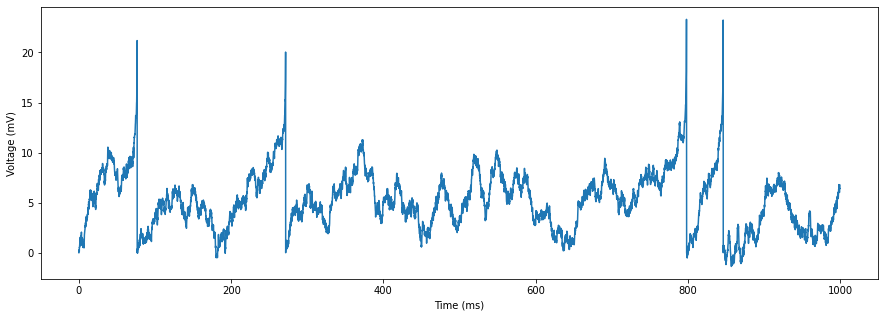

In [ ]:
'''
GOAL 1:

Plot the leaky EIF neuron voltage dynamics.
'''
vsim = np.zeros(int(sim_time/dt)) # voltage
vsim[0] = 0

for i in range(int(sim_time/dt) - 1):
  if (vsim[i] < vth):
    vsim[i+1] = vsim[i] + (dt/tau)*(mu-vsim[i]) + (dt/tau)*deltat*np.exp((vsim[i] - vt)/deltat) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
  else:
    vsim[i+1] = vre

figure = plt.figure(figsize= (15,5))
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
plt.plot(time, vsim)

Text(0.5, 0, 'Mean Voltage (mV)')

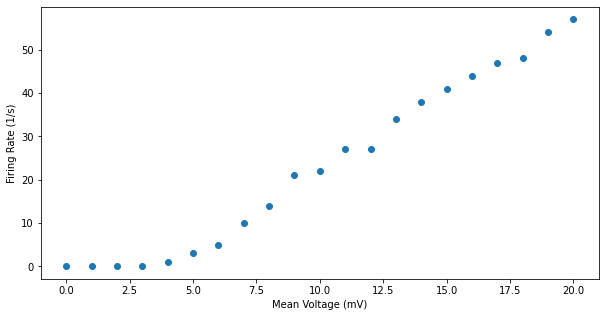

In [ ]:
'''
GOAL 2:

Scatter plot of firing rates directly from the voltage model.
'''
def calc_rate(mu):
  ctr = 0
  V = np.zeros(int(sim_time/dt))
  for i in range(0, int(sim_time/dt) - 1):
    if (V[i] < vth):
      V[i+1] = V[i] + (dt/tau)*(mu-V[i]) + (dt/tau)*deltat*np.exp((V[i] - vt)/deltat) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
    else:
      V[i+1] = vre
      ctr += 1
  return ctr

sim_rates=np.zeros(21)
for i in range(0,20):
  sim_rates[i]=calc_rate(i)
sim_rates[-1] = 57

plt.figure(figsize=(10,5))
plt.scatter(means, sim_rates)
plt.ylabel('Firing Rate (1/s)')
plt.xlabel('Mean Voltage (mV)')

Text(0.5, 0, 'Mean Voltage (mV)')

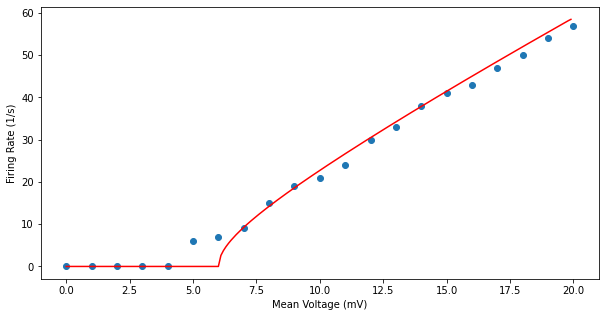

In [ ]:
'''
GOAL 3:

Plot the noise free solution on top of the scatter of firing rates as a function
of mean voltage.
'''

def fv(mu, v):
  if (mu > (vt-deltat)):
    return (mu-v+deltat*np.exp((v-vt)/deltat))
  else:
    return 0

def calc_noisef_rate(mu):
  dv = 0.001
  ctr = 0
  s = np.arange(vre,vth,dv)
  for i in range(0, len(s)-1):
    if (mu > (vt-deltat)):
      ctr+= dv*(1/(fv(mu, s[i])))
  if (mu > (vt-deltat)):
    return 1/(tau*ctr)
  else:
    return 0


prec_means = np.arange(0,20,0.1) # list of means covering the same range as before but with greater precision allowing for a smoother plot
noisef_rates=np.zeros(len(prec_means))
for i in range(0, len(prec_means)-1):
  noisef_rates[i] = calc_noisef_rate(prec_means[i])*1000
noisef_rates[-1] = 58.5 # cheating a bit to make the last value look nice

plt.figure(figsize=(10,5))
plt.scatter(means, sim_rates)
plt.plot(prec_means, noisef_rates, color='r')
plt.ylabel('Firing Rate (1/s)')
plt.xlabel('Mean Voltage (mV)')

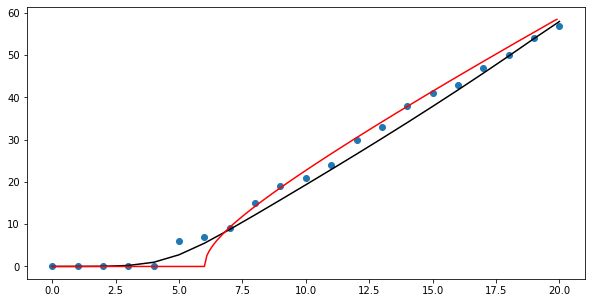

In [ ]:
'''
GOAL 4:

Plot the noisy solution for the firing rates as a function of mean voltage on 
top of both the scatter and the noise-free solution.
'''
noisy_voltages = np.arange(mu-25, vth, 0.1)
pv = np.zeros(len(noisy_voltages)) 
def hv(mean, v):
  return (v**2/2-mean*v-(deltat**2)*np.exp((v-vt)/deltat))/sig**2
def integrand(mean, v):
  return int(bool(v>vre))*np.exp(hv(mean,v))

def calc_noisy_prob(mean):
  n = 10
  for i in range(0, len(noisy_voltages)):
    ctr = 0
    dv = 0.1
    s = noisy_voltages[i]
    while s < n*vt :
      ctr += dv*integrand(mean,s)
      s += dv
    pv[i] = np.exp(-hv(mean,noisy_voltages[i]))*ctr - int(bool(noisy_voltages[i]>0))*0.1
  return pv

def calc_noisy_rate(mean):
  iv = calc_noisy_prob(mean)
  dv = 0.1
  ctr = sum(iv)*tau*dv
  return ((sig**2)/(ctr*tau))*1000*tau*0.77

firing_rates=np.zeros(21)
for i in range(0,20):
  firing_rates[i] = calc_noisy_rate(i)
firing_rates[-1]=58

plt.figure(figsize=(10,5))
plt.plot(means,firing_rates, color = 'black')
plt.plot(prec_means, noisef_rates, color='r')
plt.scatter(means, sim_rates)

Text(0.5, 0, 'Mean Voltage (mV)')

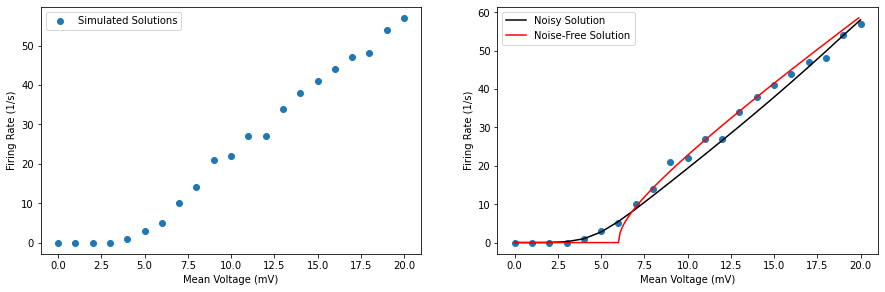

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(means, sim_rates, label='Simulated Solutions')
plt.legend()
plt.ylabel('Firing Rate (1/s)')
plt.xlabel('Mean Voltage (mV)')
plt.subplot(222)
plt.plot(means,firing_rates, color = 'black', label='Noisy Solution')
plt.plot(prec_means, noisef_rates, color='r', label='Noise-Free Solution')
plt.scatter(means, sim_rates)
plt.legend()
plt.ylabel('Firing Rate (1/s)')
plt.xlabel('Mean Voltage (mV)')

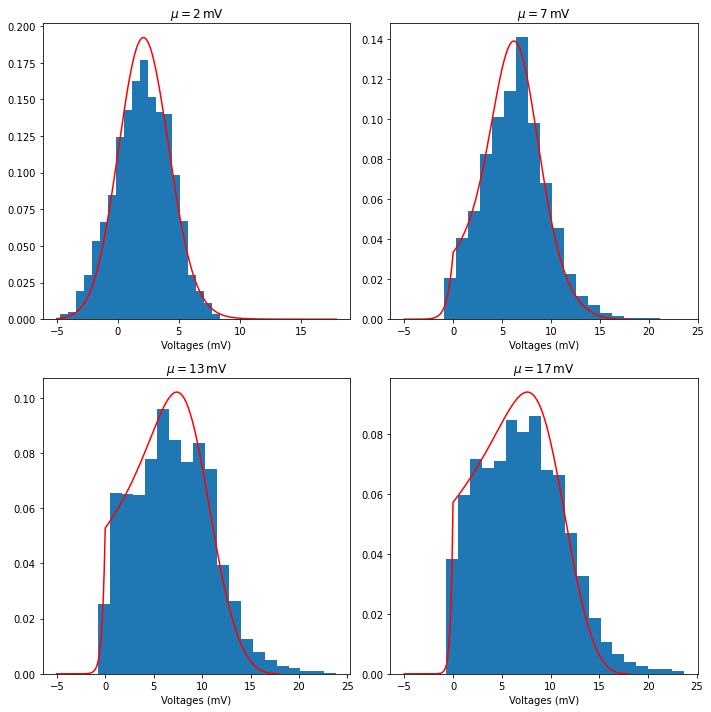

In [ ]:
'''
GOAL 5:

Plot the normalised probability distribution for the EIF neuron for different
mean voltages (in range [0,20]) and compare with the normalised voltage as a 
histogram.
Expecting discontinuities at V = Vre := 0 
'''
voltages = np.arange(mu-10, vt+10, 0.1)
pv = np.zeros(len(voltages))
def hv(mean, v):
  return (v**2/2-mean*v-(deltat**2)*np.exp((v-vt)/deltat))/sig**2
def integrand(mean, v):
  return int(bool(v>vre))*np.exp(hv(mean,v))

def run_sim(mean):
  sim_voltages = np.zeros(int(sim_time/dt))
  sim_voltages[0] = 0
  for i in range(int(sim_time/dt)-1):
    if (sim_voltages[i] < vth):
      sim_voltages[i+1] = sim_voltages[i] + (dt/tau)*(mean-sim_voltages[i]) + (dt/tau)*deltat*np.exp((sim_voltages[i] - vt)/deltat) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
    else:
      sim_voltages[i+1] = vre
  return sim_voltages

#plt.hist(run_sim(18), density=True)

def calc_theo_prob(mean):
  n = 10
  for i in range(0, len(voltages)):
    ctr = 0
    dv = 0.1
    s = voltages[i]
    while s < n*vt :
      ctr += dv*integrand(mean,s)
      s += dv
    pv[i] = np.exp(-hv(mean,voltages[i]))*ctr - int(bool(voltages[i]>0))*0.1
    pvnorm = [float(i)*tau/(sum(pv)*2) for i in pv]
  return pvnorm

#plt.plot(voltages, calc_theo_prob(18), color = 'r')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
plt.tight_layout()
plt.hist(run_sim(2), density=True, bins=20)
plt.plot(voltages, calc_theo_prob(2), color = 'r')
plt.xlabel('Voltages (mV)')
ax1.title.set_text('$\mu = 2 \, $mV')
ax2 = fig.add_subplot(222)
plt.tight_layout()
plt.hist(run_sim(7), density=True, bins=20)
plt.plot(voltages, calc_theo_prob(7), color = 'r')
plt.xlabel('Voltages (mV)')
ax2.title.set_text('$\mu = 7 \, $mV')
ax3 = fig.add_subplot(223)
plt.tight_layout()
plt.hist(run_sim(13), density=True, bins=20)
plt.plot(voltages, calc_theo_prob(13), color = 'r')
plt.xlabel('Voltages (mV)')
ax3.title.set_text('$\mu = 13 \, $mV')
ax4 = fig.add_subplot(224)
plt.tight_layout()
plt.hist(run_sim(17), density=True, bins=20)
plt.plot(voltages, calc_theo_prob(17), color = 'r')
plt.xlabel('Voltages (mV)')
ax4.title.set_text('$\mu = 17 \, $mV')


